In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import signal
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
#from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import plot_confusion_matrix

pca = PCA(n_components=3)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

In [2]:
# making plot interactive
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
IBXcodes = pd.DataFrame([['IBX001','i.p38'],['IBX002','i.JNK'],['IBX003','i.PKR'],['IBX004','i.IFNAR1'],['IBX005','i.TBK1'],['IBX006','i.BHA'],['IBX007','ISRIB'],['IBX008','i.ATM'],['IBX009','i.ERK'],['IBX0010','i.Myc'],['IBX0011','JQ1'],['IBX0012','i.PTEFb'],['IBX0013','i.TGFb'],['IBX0014_dose1','C10536_dose1'],['IBX0014_dose2','C10536_dose2'],['IBX0015','i.p38+IFNAR1'],['IBX0016','i.p38+Myc'],['IBX0017','i.Myc+i.IFNAR1']],columns=['code','perturbation']).set_index("code")
IBXcodes

,perturbation
code,
IBX001,i.p38
IBX002,i.JNK
IBX003,i.PKR
IBX004,i.IFNAR1
IBX005,i.TBK1
IBX006,i.BHA
IBX007,ISRIB
IBX008,i.ATM
IBX009,i.ERK


In [4]:
SET1_df = pd.read_csv('SET1_controls_set1_raw.csv').set_index("gene")
gene_names = SET1_df.index


In [5]:
SET1_wt = SET1_df.filter(regex='B6')
SET1_wt_av = SET1_df.filter(regex='B6_NT').mean(axis=1)
SET1_wt = SET1_wt.divide(SET1_wt_av,axis='index')

SET1_mut = SET1_df.filter(regex='1h')
SET1_mut_av = SET1_df.filter(regex='1h_NT').mean(axis=1)
SET1_mut = SET1_mut.divide(SET1_mut_av,axis='index')

SET1_fc = pd.concat([SET1_wt,SET1_mut],axis=1)
SET1_fc

,U1_B6_NT_1,U2_B6_NT_2,U3_B6_2ng_1,U4_B6_2ng_2,U5_B6_10ng_1,U6_B6_10ng_2,U7_B6_50ng_1,U8_B6_50ng_2,V1_1h_NT_1,V2_1h_NT_2,V3_1h_2ng_1,V4_1h_2ng_2,V5_1h_10ng_1,V6_1h_10ng_2,V7_1h_50ng_1,V8_1h_50ng_2
gene,,,,,,,,,,,,,,,,
Actb,0.926413,1.073587,1.177480,1.096881,1.135569,0.327879,0.377206,0.964778,1.335789,0.664211,1.377129,0.661722,1.296651,0.869856,1.333110,0.325550
Apaf1,1.299639,0.700361,2.007220,1.805054,1.335740,0.397112,0.678700,2.606498,1.579909,0.420091,3.899543,2.164384,2.447489,1.899543,3.187215,1.077626
Atf3,1.106100,0.893900,0.838092,0.853018,0.696950,0.396496,0.673913,0.981506,1.421126,0.578874,1.709632,1.081899,1.133550,1.208469,2.641228,0.919032
Atrnl1,1.000000,1.000000,4.000000,3.333333,4.333333,1.666667,1.333333,3.666667,2.000000,0.000000,0.000000,6.000000,8.000000,4.000000,14.000000,4.000000
Bhlhe40,1.102013,0.897987,0.681879,0.773154,0.767785,0.379866,1.692617,2.350336,1.395669,0.604331,1.448819,1.015748,1.330709,1.486220,4.818898,1.759843
CD68,1.248753,0.751247,1.120811,1.050566,1.024398,0.345863,0.524854,1.298193,1.574353,0.425647,2.259878,1.113506,1.359914,1.308369,1.996228,0.454203
Ch25h,1.441860,0.558140,1.069767,0.837209,3.162791,0.976744,9.627907,31.767442,1.636364,0.363636,5.090909,2.000000,15.333333,14.545455,78.606061,19.939394
Chac1,0.995215,1.004785,0.368421,0.765550,0.641148,0.440191,1.143541,1.889952,1.330454,0.669546,1.784017,0.777538,1.930886,1.680346,10.354212,2.224622
Chd7,1.360000,0.640000,0.640000,0.960000,1.360000,0.160000,0.400000,0.640000,1.666667,0.333333,4.000000,0.333333,1.333333,4.000000,2.000000,0.666667


In [6]:
SET2_df = pd.read_csv('SET2A_TNF_inhibitors_raw_ed.csv').set_index("gene")
SET2_df.columns

Index(['A1_NT_1', 'A2_NT_2', 'A3_NT_3', 'B1_TNFA_1', 'B2_TNFA_2', 'B3_TNFA_3',
       'C1_IBX001_1', 'C2_IBX001_2', 'C3_IBX001_3', 'D1_IBX002_1',
       'D2_IBX002_2', 'D3_IBX002_3', 'E1_IBX003_1', 'E2_IBX003_2',
       'E3_IBX003_3', 'F1_IBX004_1', 'F2_IBX004_2', 'F3_IBX004_3',
       'G1_IBX005_1', 'G2_IBX005_2', 'G3_IBX005_3', 'H1_IBX006_1',
       'H2_IBX006_2', 'H3_IBX006_3', 'I1_IBX007_1', 'I2_IBX007_2',
       'I3_IBX007_3', 'G1_IBX008_1', 'G2_IBX008_2', 'G3_IBX008_3',
       'K1_IBX009_1', 'K2_IBX009_2', 'K3_IBX009_3', 'L1_IBX0010_1',
       'L2_IBX0010_2', 'L3_IBX0010_3', 'M1_IBX0011_1', 'M2_IBX0011_2',
       'M3_IBX0011_3', 'N1_IBX0012_1', 'N2_IBX0012_2', 'N3_IBX0012_3',
       'O1_IBX0013_1', 'O2_IBX0013_2', 'O3_IBX0013_3', 'P1_IBX0014_dose1_1',
       'P2_IBX0014_dose1_2', 'P3_IBX0014_dose1_3', 'Q1_IBX0014_dose2_1',
       'Q2_IBX0014_dose2_2', 'Q3_IBX0014_dose2_3', 'R1_IBX0015_1',
       'R2_IBX0015_2', 'R3_IBX0015_3', 'S1_IBX0016_1', 'S2_IBX0016_2',
       'S3_IBX0016_3'

In [7]:
SET2_mut = SET2_df
SET2_mut_av = SET2_mut.filter(regex='A\d_NT_').mean(axis=1)
SET2_mut = SET2_mut.divide(SET2_mut_av,axis='index')

SETS_fc = pd.concat([SET1_fc,SET2_mut],axis=1)
SETS_fc.columns

Index(['U1_B6_NT_1', 'U2_B6_NT_2', 'U3_B6_2ng_1', 'U4_B6_2ng_2',
       'U5_B6_10ng_1', 'U6_B6_10ng_2', 'U7_B6_50ng_1', 'U8_B6_50ng_2',
       'V1_1h_NT_1', 'V2_1h_NT_2', 'V3_1h_2ng_1', 'V4_1h_2ng_2',
       'V5_1h_10ng_1', 'V6_1h_10ng_2', 'V7_1h_50ng_1', 'V8_1h_50ng_2',
       'A1_NT_1', 'A2_NT_2', 'A3_NT_3', 'B1_TNFA_1', 'B2_TNFA_2', 'B3_TNFA_3',
       'C1_IBX001_1', 'C2_IBX001_2', 'C3_IBX001_3', 'D1_IBX002_1',
       'D2_IBX002_2', 'D3_IBX002_3', 'E1_IBX003_1', 'E2_IBX003_2',
       'E3_IBX003_3', 'F1_IBX004_1', 'F2_IBX004_2', 'F3_IBX004_3',
       'G1_IBX005_1', 'G2_IBX005_2', 'G3_IBX005_3', 'H1_IBX006_1',
       'H2_IBX006_2', 'H3_IBX006_3', 'I1_IBX007_1', 'I2_IBX007_2',
       'I3_IBX007_3', 'G1_IBX008_1', 'G2_IBX008_2', 'G3_IBX008_3',
       'K1_IBX009_1', 'K2_IBX009_2', 'K3_IBX009_3', 'L1_IBX0010_1',
       'L2_IBX0010_2', 'L3_IBX0010_3', 'M1_IBX0011_1', 'M2_IBX0011_2',
       'M3_IBX0011_3', 'N1_IBX0012_1', 'N2_IBX0012_2', 'N3_IBX0012_3',
       'O1_IBX0013_1', 'O2_IBX0013_2'

In [8]:
Spca_fc_ = pca.fit_transform(np.transpose(SETS_fc))
PCA_SETS = pd.DataFrame(Spca_fc_,columns=["PC1","PC2","PC3"]).set_index(SETS_fc.columns)
PCAweights_fc_ = pca.components_
PCA_contr = pca.explained_variance_ratio_
print("Explained variances by components: ", PCA_contr, "total variance explained: ",sum(PCA_contr))


Explained variances by components:  [0.72502915 0.11467234 0.06813723] total variance explained:  0.9078387114402819


<IPython.core.display.Javascript object>


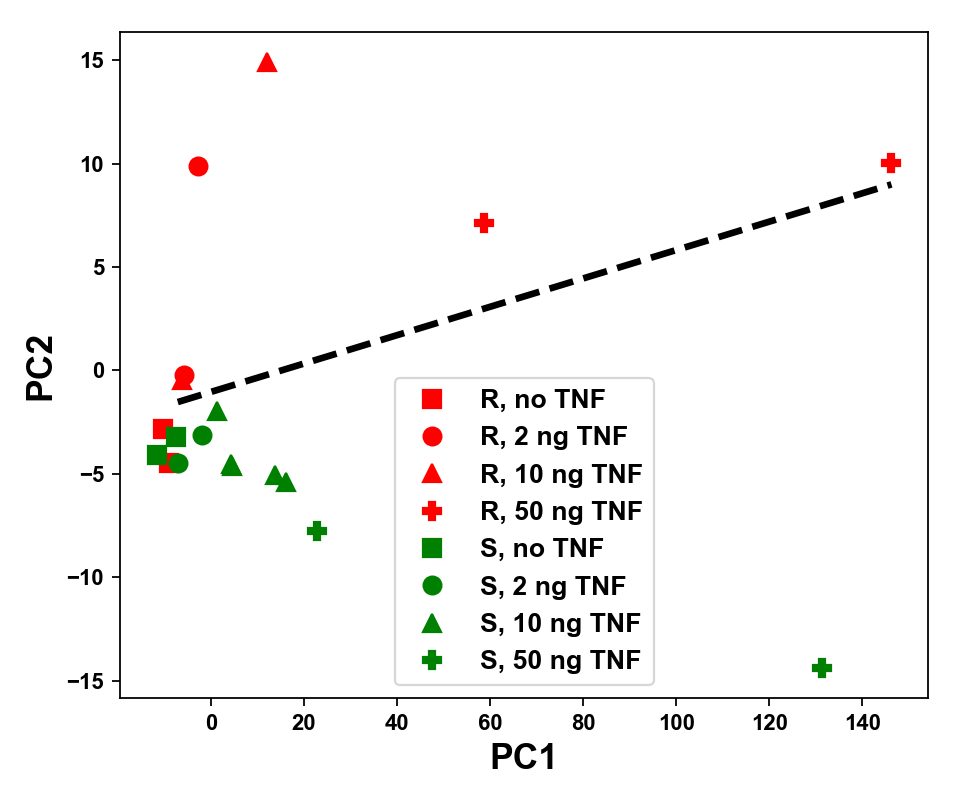

In [9]:
allconds = pd.concat([PCA_SETS.filter(regex=".*\d+ng.*",axis=0),PCA_SETS.filter(regex=".*TNFA.*",axis=0)]).iloc[:,0:2]
allcls = np.zeros(len(allconds))
allcls[0]=1
allcls[1]=1
allcls[2]=1
allcls[3]=1
allcls[4]=1
allcls[5]=1

svc_2D_SETS = SVC(kernel='linear')
svc_2D_SETS.fit(allconds,allcls)
norm_vec_2D_SETS = svc_2D_SETS.coef_[0]/linalg.norm(svc_2D_SETS.coef_[0])
y = lambda x: (-svc_2D_SETS.intercept_[0]-svc_2D_SETS.coef_[0][0]*x) / svc_2D_SETS.coef_[0][1]

xs = np.linspace(min(allconds.iloc[:,0]),max(allconds.iloc[:,0]),10)

plt.figure(figsize=(6,5))

# B6 states SET1
plt.plot(PCA_SETS.filter(regex=".*B6_NT.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_NT.*",axis=0).iloc[:,1],'s',color='red',ms=8,label='R, no TNF') 
plt.plot(PCA_SETS.filter(regex=".*B6_2ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_2ng.*",axis=0).iloc[:,1],'o',color='red',ms=8,label='R, 2 ng TNF') 
plt.plot(PCA_SETS.filter(regex=".*B6_10ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_10ng.*",axis=0).iloc[:,1],'^',color='red',ms=8,label='R, 10 ng TNF') 
plt.plot(PCA_SETS.filter(regex=".*B6_50ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_50ng.*",axis=0).iloc[:,1],'P',color='red',ms=8,label='R, 50 ng TNF') 
# 1h states SET1
plt.plot(PCA_SETS.filter(regex=".*1h_NT.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_NT.*",axis=0).iloc[:,1],'s',color='green',ms=8,label='S, no TNF') 
plt.plot(PCA_SETS.filter(regex=".*1h_2ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_2ng.*",axis=0).iloc[:,1],'o',color='green',ms=8,label='S, 2 ng TNF') 
plt.plot(PCA_SETS.filter(regex=".*1h_10ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_10ng.*",axis=0).iloc[:,1],'^',color='green',ms=8,label='S, 10 ng TNF') 
plt.plot(PCA_SETS.filter(regex=".*1h_50ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_50ng.*",axis=0).iloc[:,1],'P',color='green',ms=8,label='S, 50 ng TNF') 
# 1h states SET2
plt.plot(PCA_SETS.filter(regex=".*TNFA.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*TNFA.*",axis=0).iloc[:,1],'^',color='green',ms=8,label='_nolegend_') 

plt.plot(xs,y(xs),'--',color='black',linewidth=3)

plt.xlabel("PC1",**fontLabel)
plt.ylabel("PC2",**fontLabel)
plt.legend(numpoints=1,prop=fontAxes)

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


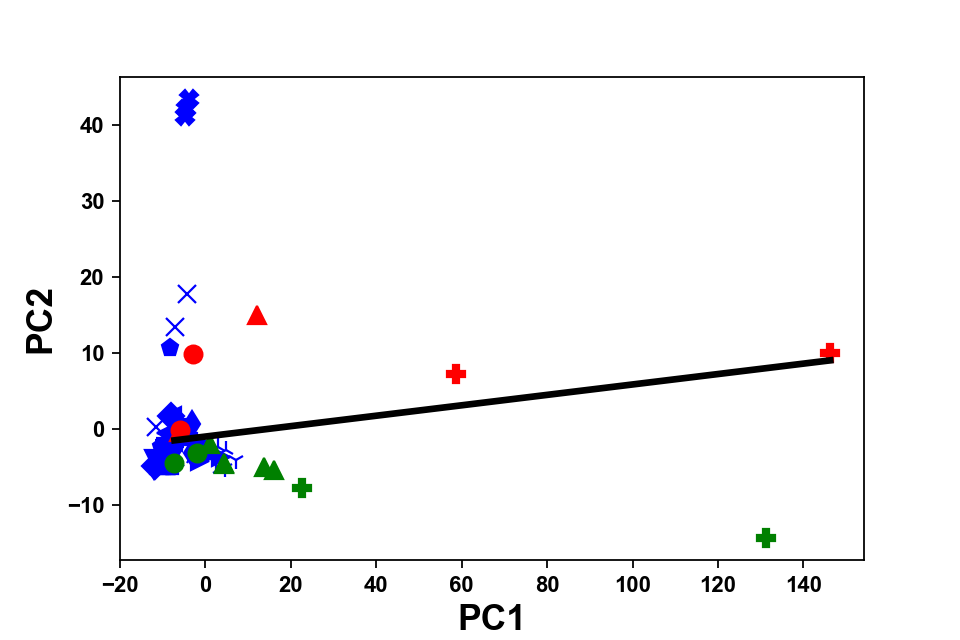

In [10]:
allconds = pd.concat([PCA_SETS.filter(regex=".*\d+ng.*",axis=0),PCA_SETS.filter(regex=".*TNFA.*",axis=0)]).iloc[:,0:2]
allcls = np.zeros(len(allconds))
allcls[0]=1
allcls[1]=1
allcls[2]=1
allcls[3]=1
allcls[4]=1
allcls[5]=1

#svc_2D_SETS = SVC(C=100,kernel='linear',class_weight='balanced')
svc_2D_SETS = SVC(kernel='linear')
svc_2D_SETS.fit(allconds,allcls)
norm_vec_2D_SETS = svc_2D_SETS.coef_[0]/linalg.norm(svc_2D_SETS.coef_[0])
y = lambda x: (-svc_2D_SETS.intercept_[0]-svc_2D_SETS.coef_[0][0]*x) / svc_2D_SETS.coef_[0][1]

xs = np.linspace(min(allconds.iloc[:,0]),max(allconds.iloc[:,0]),10)

plt.figure()

# perturbed 1h states SET2
# IBX1 - i.p38
plt.plot(PCA_SETS.filter(regex=".*IBX001_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX001_.*",axis=0).iloc[:,1],'^',color='blue',ms=8) 
# IBX2 - i.JNK
plt.plot(PCA_SETS.filter(regex=".*IBX002_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX002_.*",axis=0).iloc[:,1],'P',color='blue',ms=8) 
# IBX3 - i.PKR
plt.plot(PCA_SETS.filter(regex=".*IBX003_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX003_.*",axis=0).iloc[:,1],'H',color='blue',ms=8) 
# IBX4 - i.IFNAR1
plt.plot(PCA_SETS.filter(regex=".*IBX004_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX004_.*",axis=0).iloc[:,1],'s',color='blue',ms=8) 
# IBX5 - i.TBK1
plt.plot(PCA_SETS.filter(regex=".*IBX005_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX005_.*",axis=0).iloc[:,1],'v',color='blue',ms=8) 
# IBX6 - i.BHA
plt.plot(PCA_SETS.filter(regex=".*IBX006_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX006_.*",axis=0).iloc[:,1],'<',color='blue',ms=8) 
# IBX7 - ISRIB
plt.plot(PCA_SETS.filter(regex=".*IBX007_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX007_.*",axis=0).iloc[:,1],'>',color='blue',ms=8) 
# IBX8 - i.ATM
plt.plot(PCA_SETS.filter(regex=".*IBX008_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX008_.*",axis=0).iloc[:,1],'1',color='blue',ms=8) 
# IBX9 - i.ERK
plt.plot(PCA_SETS.filter(regex=".*IBX009_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX009_.*",axis=0).iloc[:,1],'2',color='blue',ms=8) 
# IBX10 - i.Myc
plt.plot(PCA_SETS.filter(regex=".*IBX0010_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0010_.*",axis=0).iloc[:,1],'3',color='blue',ms=8) 
# IBX11 - JQ1
plt.plot(PCA_SETS.filter(regex=".*IBX0011_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0011_.*",axis=0).iloc[:,1],'4',color='blue',ms=8) 
# IBX12 - i.PTEFb
plt.plot(PCA_SETS.filter(regex=".*IBX0012_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0012_.*",axis=0).iloc[:,1],'+',color='blue',ms=8) 
# IBX13 - i.TGFb
plt.plot(PCA_SETS.filter(regex=".*IBX0013_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0013_.*",axis=0).iloc[:,1],'d',color='blue',ms=8) 
# IBX14 dose 1 - C10536_dose1
plt.plot(PCA_SETS.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,1],'x',color='blue',ms=8) 
# IBX14 dose 2 - C10536_dose2
plt.plot(PCA_SETS.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,1],'X',color='blue',ms=8) 
# IBX15 - i.p38+IFNAR1
plt.plot(PCA_SETS.filter(regex=".*IBX0015_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0015_.*",axis=0).iloc[:,1],'*',color='blue',ms=8) 
# IBX16 - i.p38+Myc
plt.plot(PCA_SETS.filter(regex=".*IBX0016_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0016_.*",axis=0).iloc[:,1],'p',color='blue',ms=8) 
# IBX17 - i.Myc+i.IFNAR1
plt.plot(PCA_SETS.filter(regex=".*IBX0017_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0017_.*",axis=0).iloc[:,1],'D',color='blue',ms=8) 


# B6 states SET1
#plt.plot(PCA_SETS.filter(regex=".*B6_NT.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_NT.*",axis=0).iloc[:,1],'s',color='red',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*B6_2ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_2ng.*",axis=0).iloc[:,1],'o',color='red',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*B6_10ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_10ng.*",axis=0).iloc[:,1],'^',color='red',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*B6_50ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_50ng.*",axis=0).iloc[:,1],'P',color='red',ms=8) 
# 1h states SET1
#plt.plot(PCA_SETS.filter(regex=".*1h_NT.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_NT.*",axis=0).iloc[:,1],'s',color='green',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*1h_2ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_2ng.*",axis=0).iloc[:,1],'o',color='green',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*1h_10ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_10ng.*",axis=0).iloc[:,1],'^',color='green',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*1h_50ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_50ng.*",axis=0).iloc[:,1],'P',color='green',ms=8) 
# 1h states SET2
plt.plot(PCA_SETS.filter(regex=".*TNFA.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*TNFA.*",axis=0).iloc[:,1],'^',color='green',ms=8) 

plt.plot(xs,y(xs),'-',color='black',linewidth=3)

plt.xlabel("PC1",**fontLabel)
plt.ylabel("PC2",**fontLabel)

plt.show()


<IPython.core.display.Javascript object>


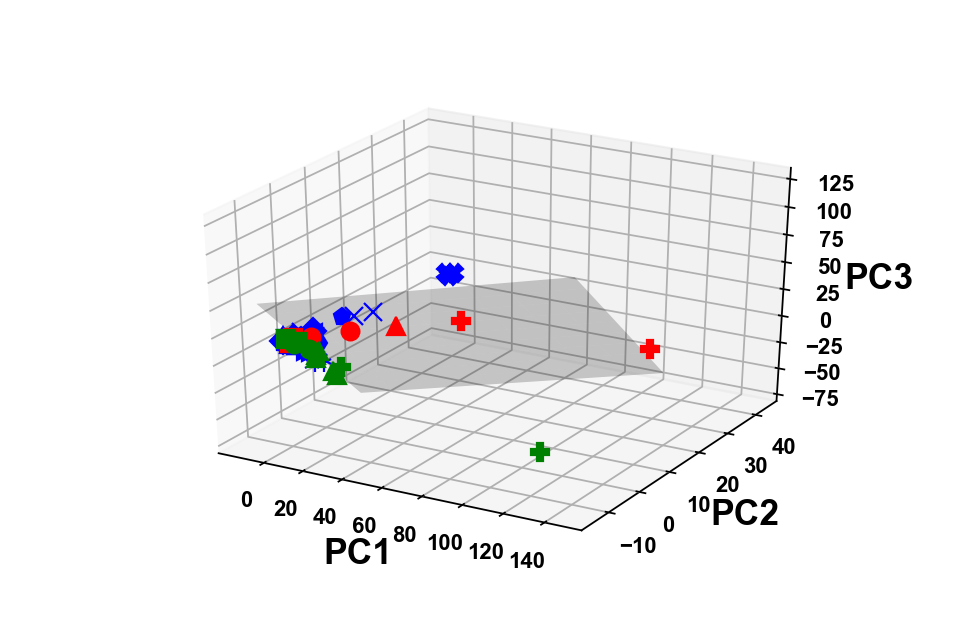

In [12]:
allconds = pd.concat([PCA_SETS.filter(regex=".*\d+ng.*",axis=0),PCA_SETS.filter(regex=".*TNFA.*",axis=0)])
allcls = np.zeros(len(allconds))
allcls[0]=1
allcls[1]=1
allcls[2]=1
allcls[3]=1
allcls[4]=1
allcls[5]=1

svc_3D_SETS = SVC(C=100,kernel='linear',class_weight='balanced')
svc_3D_SETS.fit(allconds,allcls)
norm_vec_3D_SETS = svc_3D_SETS.coef_[0]/linalg.norm(svc_3D_SETS.coef_[0])
z = lambda x,y: (-svc_3D_SETS.intercept_[0]-svc_3D_SETS.coef_[0][0]*x-svc_3D_SETS.coef_[0][1]*y) / svc_3D_SETS.coef_[0][2]
tmpx = np.linspace(min(allconds.iloc[:,0]),max(allconds.iloc[:,0]),10)
tmpy = np.linspace(min(allconds.iloc[:,1]),max(allconds.iloc[:,1]),10)
xs,ys = np.meshgrid(tmpx,tmpy)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(xs, ys, z(xs,ys),color='black',linewidth=0,alpha=0.2)

# perturbed 1h states SET2
# IBX1 - i.p38
plt.plot(PCA_SETS.filter(regex=".*IBX001_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX001_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX001_.*",axis=0).iloc[:,2],'^',color='blue',ms=8) 
# IBX2 - i.JNK
plt.plot(PCA_SETS.filter(regex=".*IBX002_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX002_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX002_.*",axis=0).iloc[:,2],'P',color='blue',ms=8) 
# IBX3 - i.PKR
plt.plot(PCA_SETS.filter(regex=".*IBX003_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX003_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX003_.*",axis=0).iloc[:,2],'H',color='blue',ms=8) 
# IBX4 - i.IFNAR1
plt.plot(PCA_SETS.filter(regex=".*IBX004_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX004_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX004_.*",axis=0).iloc[:,2],'s',color='blue',ms=8) 
# IBX5 - i.TBK1
plt.plot(PCA_SETS.filter(regex=".*IBX005_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX005_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX005_.*",axis=0).iloc[:,2],'v',color='blue',ms=8) 
# IBX6 - i.BHA
plt.plot(PCA_SETS.filter(regex=".*IBX006_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX006_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX006_.*",axis=0).iloc[:,2],'<',color='blue',ms=8) 
# IBX7 - ISRIB
plt.plot(PCA_SETS.filter(regex=".*IBX007_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX007_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX007_.*",axis=0).iloc[:,2],'>',color='blue',ms=8) 
# IBX8 - i.ATM
plt.plot(PCA_SETS.filter(regex=".*IBX008_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX008_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX008_.*",axis=0).iloc[:,2],'1',color='blue',ms=8) 
# IBX9 - i.ERK
plt.plot(PCA_SETS.filter(regex=".*IBX009_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX009_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX009_.*",axis=0).iloc[:,2],'2',color='blue',ms=8) 
# IBX10 - i.Myc
plt.plot(PCA_SETS.filter(regex=".*IBX0010_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0010_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0010_.*",axis=0).iloc[:,2],'3',color='blue',ms=8) 
# IBX11 - JQ1
plt.plot(PCA_SETS.filter(regex=".*IBX0011_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0011_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0011_.*",axis=0).iloc[:,2],'4',color='blue',ms=8) 
# IBX12 - i.PTEFb
plt.plot(PCA_SETS.filter(regex=".*IBX0012_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0012_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0012_.*",axis=0).iloc[:,2],'+',color='blue',ms=8) 
# IBX13 - i.TGFb
plt.plot(PCA_SETS.filter(regex=".*IBX0013_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0013_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0013_.*",axis=0).iloc[:,2],'d',color='blue',ms=8) 
# IBX14 dose 1 - C10536_dose1
plt.plot(PCA_SETS.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,2],'x',color='blue',ms=8) 
# IBX14 dose 2 - C10536_dose2
plt.plot(PCA_SETS.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,2],'X',color='blue',ms=8) 
# IBX15 - i.p38+IFNAR1
plt.plot(PCA_SETS.filter(regex=".*IBX0015_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0015_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0015_.*",axis=0).iloc[:,2],'*',color='blue',ms=8) 
# IBX16 - i.p38+Myc
plt.plot(PCA_SETS.filter(regex=".*IBX0016_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0016_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0016_.*",axis=0).iloc[:,2],'p',color='blue',ms=8) 
# IBX17 - i.Myc+i.IFNAR1
plt.plot(PCA_SETS.filter(regex=".*IBX0017_.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*IBX0017_.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*IBX0017_.*",axis=0).iloc[:,2],'D',color='blue',ms=8) 


# B6 states SET1
plt.plot(PCA_SETS.filter(regex=".*B6_NT.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_NT.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*B6_NT.*",axis=0).iloc[:,2],'s',color='red',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*B6_2ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_2ng.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*B6_2ng.*",axis=0).iloc[:,2],'o',color='red',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*B6_10ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_10ng.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*B6_10ng.*",axis=0).iloc[:,2],'^',color='red',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*B6_50ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*B6_50ng.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*B6_50ng.*",axis=0).iloc[:,2],'P',color='red',ms=8) 
# 1h states SET1
plt.plot(PCA_SETS.filter(regex=".*1h_NT.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_NT.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*1h_NT.*",axis=0).iloc[:,2],'s',color='green',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*1h_2ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_2ng.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*1h_2ng.*",axis=0).iloc[:,2],'o',color='green',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*1h_10ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_10ng.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*1h_10ng.*",axis=0).iloc[:,2],'^',color='green',ms=8) 
plt.plot(PCA_SETS.filter(regex=".*1h_50ng.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*1h_50ng.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*1h_50ng.*",axis=0).iloc[:,2],'P',color='green',ms=8) 
# 1h states SET2
plt.plot(PCA_SETS.filter(regex=".*TNFA.*",axis=0).iloc[:,0],PCA_SETS.filter(regex=".*TNFA.*",axis=0).iloc[:,1],PCA_SETS.filter(regex=".*TNFA.*",axis=0).iloc[:,2],'^',color='green',ms=8) 

ax.set_xlabel("PC1",**fontLabel)
ax.set_ylabel("PC2",**fontLabel)
ax.set_zlabel("PC3",**fontLabel)

plt.show()


24.14616131374742


<IPython.core.display.Javascript object>


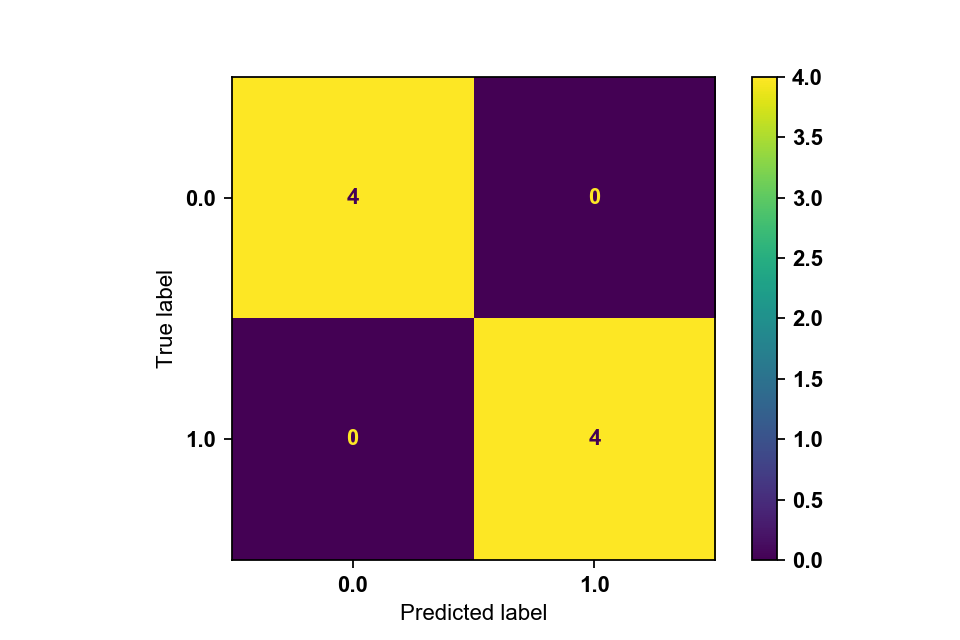

In [13]:
TNF_conds = pd.concat([SETS_fc.filter(regex='_(B6|1h)_NT_\d'),SETS_fc.filter(regex='_(B6|1h)_50ng_\d')],axis=1)
TNF_cls = list(np.zeros(len(SETS_fc.filter(regex='_(B6|1h)_NT_\d').columns))) + list(np.ones(len(SETS_fc.filter(regex='_(B6|1h)_50ng_\d').columns)))

NT_cnt = SETS_fc.filter(regex='_(B6|1h)_NT_\d').mean(axis=1)
TNF_cnt = SETS_fc.filter(regex='_(B6|1h)_50ng_\d').mean(axis=1)

svc_TNF = SVC(C=100,kernel='linear')
svc_TNF.fit(TNF_conds.transpose(),TNF_cls)

norm_vec_TNF = svc_TNF.coef_[0]/linalg.norm(svc_TNF.coef_[0])
b_TNF = svc_TNF.intercept_[0]/linalg.norm(svc_TNF.coef_[0])
s_vec_TNF = (TNF_cnt - NT_cnt)/linalg.norm(TNF_cnt - NT_cnt)

angle_TNF = (np.arccos(np.dot(norm_vec_TNF,s_vec_TNF))/np.pi)*180
print(angle_TNF)

plot_confusion_matrix(svc_TNF,TNF_conds.transpose(),TNF_cls)


53.52860232389394


<IPython.core.display.Javascript object>


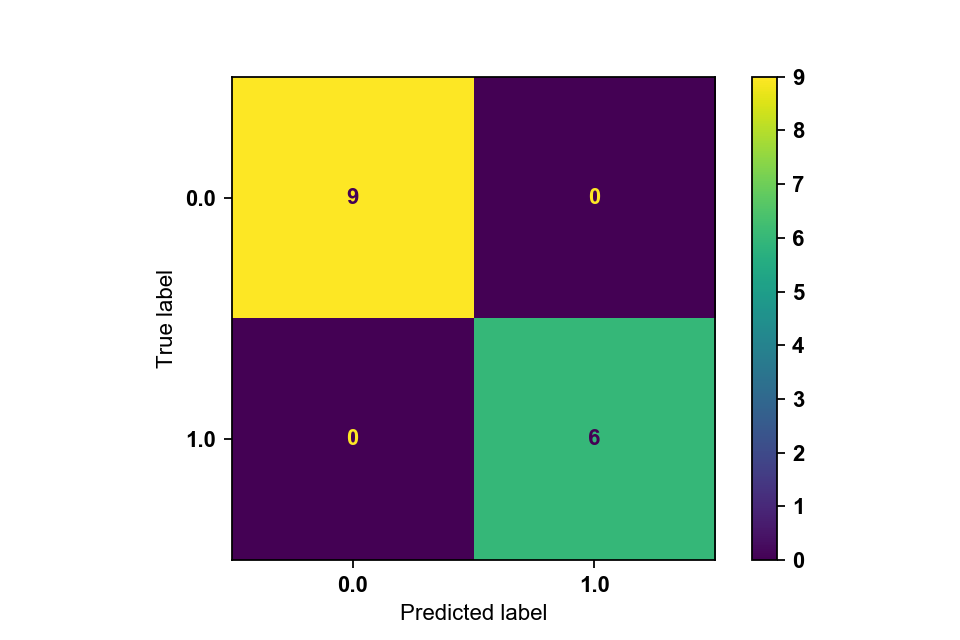

In [14]:
TB_conds = pd.concat([SETS_fc.filter(regex='_B6_\d+ng_\d'),SETS_fc.filter(regex='_1h_\d+ng_\d'),SETS_fc.filter(regex='B\d_TNFA_\d')],axis=1)
TB_cls = list(np.ones(len(SETS_fc.filter(regex='_B6_\d+ng_\d').columns))) + list(np.zeros(len(SETS_fc.filter(regex='_1h_\d+ng_\d').columns))) + list(np.zeros(len(SETS_fc.filter(regex='B\d_TNFA_\d').columns)))

sens_cnt = pd.concat([SETS_fc.filter(regex='_1h_\d+ng_\d'),SETS_fc.filter(regex='B\d_TNFA_\d')],axis=1).mean(axis=1)
rest_cnt = SETS_fc.filter(regex='_B6_\d+ng_\d').mean(axis=1)

svc_TB = SVC(C=100,kernel='linear')
svc_TB.fit(TB_conds.transpose(),TB_cls)

norm_vec_TB = svc_TB.coef_[0]/linalg.norm(svc_TB.coef_[0])
b_TB = svc_TB.intercept_[0]/linalg.norm(svc_TB.coef_[0])
s_vec_TB = (rest_cnt - sens_cnt)/linalg.norm(rest_cnt - sens_cnt)

angle_TB = (np.arccos(np.dot(norm_vec_TB,s_vec_TB))/np.pi)*180
print(angle_TB)

plot_confusion_matrix(svc_TB,TB_conds.transpose(),TB_cls)


In [15]:
norm_vec_2D_df = pd.DataFrame(np.array([norm_vec_TNF,np.array(s_vec_TNF),norm_vec_TB,np.array(s_vec_TB)]),columns=SETS_fc.index,index=['norm_vec_TNF','s_vec_TNF','norm_vec_TB','s_vec_TB']).T
norm_vec_2D_df.to_csv('STV_2D.csv')
angle_n_vecs = (np.arccos(np.dot(norm_vec_TNF,norm_vec_TB))/np.pi)*180
print(angle_n_vecs)


102.94183128097762


In [16]:
DPDs_2D = pd.DataFrame(np.zeros((len(SETS_fc.columns),2)),index=SETS_fc.columns,columns=['DPD_TNF','DPD_TB'])

for smpl in SETS_fc.columns:
    DPDs_2D.at[smpl,'DPD_TNF'] = - (-b_TNF - np.dot(SETS_fc.loc[:,smpl],norm_vec_2D_df['norm_vec_TNF']))
    DPDs_2D.at[smpl,'DPD_TB'] = - (-b_TB - np.dot(SETS_fc.loc[:,smpl],norm_vec_2D_df['norm_vec_TB']))
        
DPDs_2D.to_csv('DPDs.csv')
DPDs_2D


,DPD_TNF,DPD_TB
U1_B6_NT_1,-17.711876,-1.188422
U2_B6_NT_2,-18.352862,-0.172580
U3_B6_2ng_1,-16.209166,4.235965
U4_B6_2ng_2,-16.596354,11.751766
U5_B6_10ng_1,-4.868285,16.424502
U6_B6_10ng_2,-15.934487,4.237356
U7_B6_50ng_1,40.276062,4.237357
U8_B6_50ng_2,111.792675,4.570278
V1_1h_NT_1,-16.695109,-1.650040
V2_1h_NT_2,-19.369629,0.289038


<IPython.core.display.Javascript object>


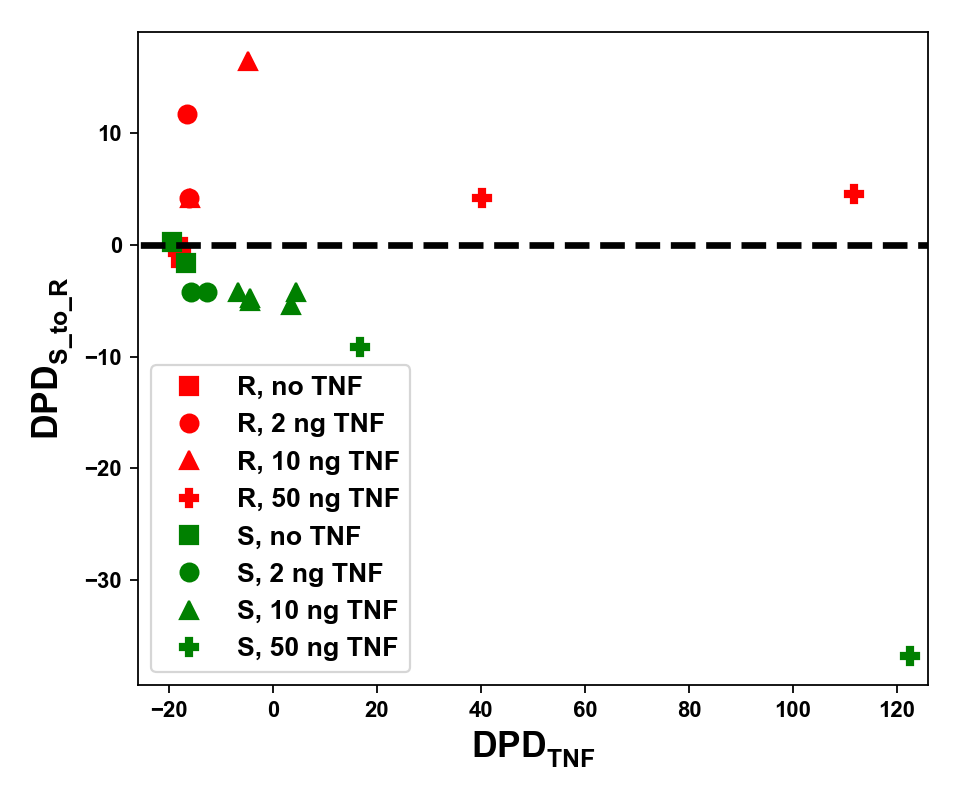

In [17]:
plt.figure(figsize=(6,5))

# B6 states SET1
plt.plot(DPDs_2D.filter(regex=".*B6_NT.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_NT.*",axis=0).iloc[:,1],'s',color='red',ms=8,label='R, no TNF') 
plt.plot(DPDs_2D.filter(regex=".*B6_2ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_2ng.*",axis=0).iloc[:,1],'o',color='red',ms=8,label='R, 2 ng TNF') 
plt.plot(DPDs_2D.filter(regex=".*B6_10ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_10ng.*",axis=0).iloc[:,1],'^',color='red',ms=8,label='R, 10 ng TNF') 
plt.plot(DPDs_2D.filter(regex=".*B6_50ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_50ng.*",axis=0).iloc[:,1],'P',color='red',ms=8,label='R, 50 ng TNF') 
# 1h states SET1
plt.plot(DPDs_2D.filter(regex=".*1h_NT.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_NT.*",axis=0).iloc[:,1],'s',color='green',ms=8,label='S, no TNF') 
plt.plot(DPDs_2D.filter(regex=".*1h_2ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_2ng.*",axis=0).iloc[:,1],'o',color='green',ms=8,label='S, 2 ng TNF') 
plt.plot(DPDs_2D.filter(regex=".*1h_10ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_10ng.*",axis=0).iloc[:,1],'^',color='green',ms=8,label='S, 10 ng TNF') 
plt.plot(DPDs_2D.filter(regex=".*1h_50ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_50ng.*",axis=0).iloc[:,1],'P',color='green',ms=8,label='S, 50 ng TNF') 
# 1h states SET2
plt.plot(DPDs_2D.filter(regex=".*TNFA.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*TNFA.*",axis=0).iloc[:,1],'^',color='green',ms=8,label='_nolegend_') 

plt.plot([-100,200],[0,0],'--',color='black',linewidth=3)
#plt.plot(xs,y(xs),'-',color='black',linewidth=3)
plt.xlim(-26,126)

plt.xlabel("$\mathregular{DPD_{TNF}}$",**fontLabel)
plt.ylabel("$\mathregular{DPD_{S\_to\_R}}$",**fontLabel)
plt.legend(numpoints=1,prop=fontAxes,loc='lower left')

plt.tight_layout()
plt.show()


<IPython.core.display.Javascript object>


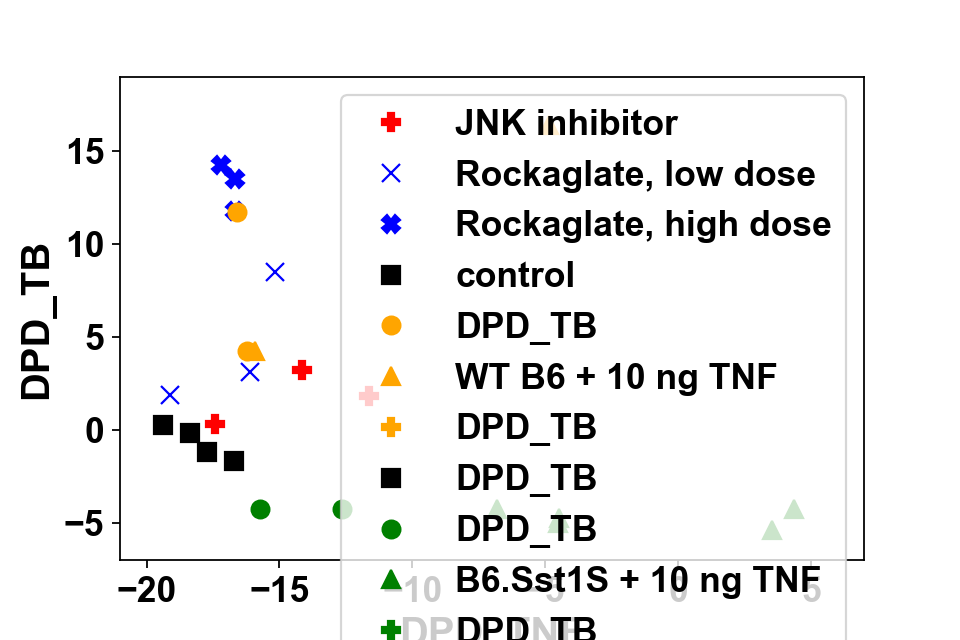

In [18]:
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
plt.rc('font', **fontAxes)


plt.figure()

# perturbed 1h states SET2
# IBX1 - i.p38
#plt.plot(DPDs_2D.filter(regex=".*IBX001_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX001_.*",axis=0).iloc[:,1],'^',color='blue',ms=8,label='p38 inhibitor') 
# IBX2 - i.JNK
plt.plot(DPDs_2D.filter(regex=".*IBX002_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX002_.*",axis=0).iloc[:,1],'P',color='red',ms=8,label='JNK inhibitor') 
# IBX3 - i.PKR
#plt.plot(DPDs_2D.filter(regex=".*IBX003_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX003_.*",axis=0).iloc[:,1],'H',color='blue',ms=8,label='PKR inhibitor') 
# IBX4 - i.IFNAR1
#plt.plot(DPDs_2D.filter(regex=".*IBX004_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX004_.*",axis=0).iloc[:,1],'s',color='blue',ms=8,label='IFNAR1 inhibitor') 
# IBX5 - i.TBK1
#plt.plot(DPDs_2D.filter(regex=".*IBX005_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX005_.*",axis=0).iloc[:,1],'v',color='blue',ms=8,label='TBK1 inhibitor') 
# IBX6 - i.BHA
#plt.plot(DPDs_2D.filter(regex=".*IBX006_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX006_.*",axis=0).iloc[:,1],'<',color='blue',ms=8,label='ROS scavenger BHA') 
# IBX7 - ISRIB
#plt.plot(DPDs_2D.filter(regex=".*IBX007_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX007_.*",axis=0).iloc[:,1],'>',color='blue',ms=8,label='ISRIB') 
# IBX8 - i.ATM
#plt.plot(DPDs_2D.filter(regex=".*IBX008_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX008_.*",axis=0).iloc[:,1],'1',color='blue',ms=8,label='ATM inhibitor') 
# IBX9 - i.ERK
#plt.plot(DPDs_2D.filter(regex=".*IBX009_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX009_.*",axis=0).iloc[:,1],'2',color='blue',ms=8,label='ERK inhibitor') 
# IBX10 - i.Myc
#plt.plot(DPDs_2D.filter(regex=".*IBX0010_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0010_.*",axis=0).iloc[:,1],'3',color='blue',ms=8,label='MYC-MAX inhibitor') 
# IBX11 - JQ1
#plt.plot(DPDs_2D.filter(regex=".*IBX0011_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0011_.*",axis=0).iloc[:,1],'4',color='blue',ms=8,label='JQ1, BET inhibitor') 
# IBX12 - i.PTEFb
#plt.plot(DPDs_2D.filter(regex=".*IBX0012_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0012_.*",axis=0).iloc[:,1],'+',color='blue',ms=8,label='PTEFb inhibitor') 
# IBX13 - i.TGFb
#plt.plot(DPDs_2D.filter(regex=".*IBX0013_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0013_.*",axis=0).iloc[:,1],'d',color='blue',ms=8,label='TGFb inhibitor') 
# IBX14 dose 1 - C10536_dose1
plt.plot(DPDs_2D.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,1],'x',color='blue',ms=8,label='Rockaglate, low dose') 
# IBX14 dose 2 - C10536_dose2
plt.plot(DPDs_2D.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,1],'X',color='blue',ms=8,label='Rockaglate, high dose') 
# IBX15 - i.p38+IFNAR1
#plt.plot(DPDs_2D.filter(regex=".*IBX0015_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0015_.*",axis=0).iloc[:,1],'*',color='blue',ms=8,label='p38+IFNAR1 inhibitors') 
# IBX16 - i.p38+Myc
#plt.plot(DPDs_2D.filter(regex=".*IBX0016_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0016_.*",axis=0).iloc[:,1],'p',color='blue',ms=8,label='p38+MYC-MAX inhibitors') 
# IBX17 - i.Myc+i.IFNAR1
#plt.plot(DPDs_2D.filter(regex=".*IBX0017_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0017_.*",axis=0).iloc[:,1],'D',color='blue',ms=8,label='MYC-MAX+IFNAR1 inhibitors') 


# B6 states SET1
plt.plot(DPDs_2D.filter(regex=".*B6_NT.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_NT.*",axis=0).iloc[:,1],'s',color='black',label='control',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*B6_2ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_2ng.*",axis=0).iloc[:,1],'o',color='orange',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*B6_10ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_10ng.*",axis=0).iloc[:,1],'^',color='orange',label='WT B6 + 10 ng TNF',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*B6_50ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_50ng.*",axis=0).iloc[:,1],'P',color='orange',ms=8) 
# 1h states SET1
plt.plot(DPDs_2D.filter(regex=".*1h_NT.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_NT.*",axis=0).iloc[:,1],'s',color='black',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*1h_2ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_2ng.*",axis=0).iloc[:,1],'o',color='green',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*1h_10ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_10ng.*",axis=0).iloc[:,1],'^',color='green',label='B6.Sst1S + 10 ng TNF',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*1h_50ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_50ng.*",axis=0).iloc[:,1],'P',color='green',ms=8) 
# 1h states SET2
plt.plot(DPDs_2D.filter(regex=".*TNFA.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*TNFA.*",axis=0).iloc[:,1],'^',color='green',ms=8) 

#plt.plot(xs,y(xs),'-',color='black',linewidth=3)

plt.xlabel("DPD_TNF",**fontLabel)
plt.ylabel("DPD_TB",**fontLabel)

plt.xlim(-21,7)
plt.ylim(-7,19)
plt.legend()

plt.show()


<IPython.core.display.Javascript object>


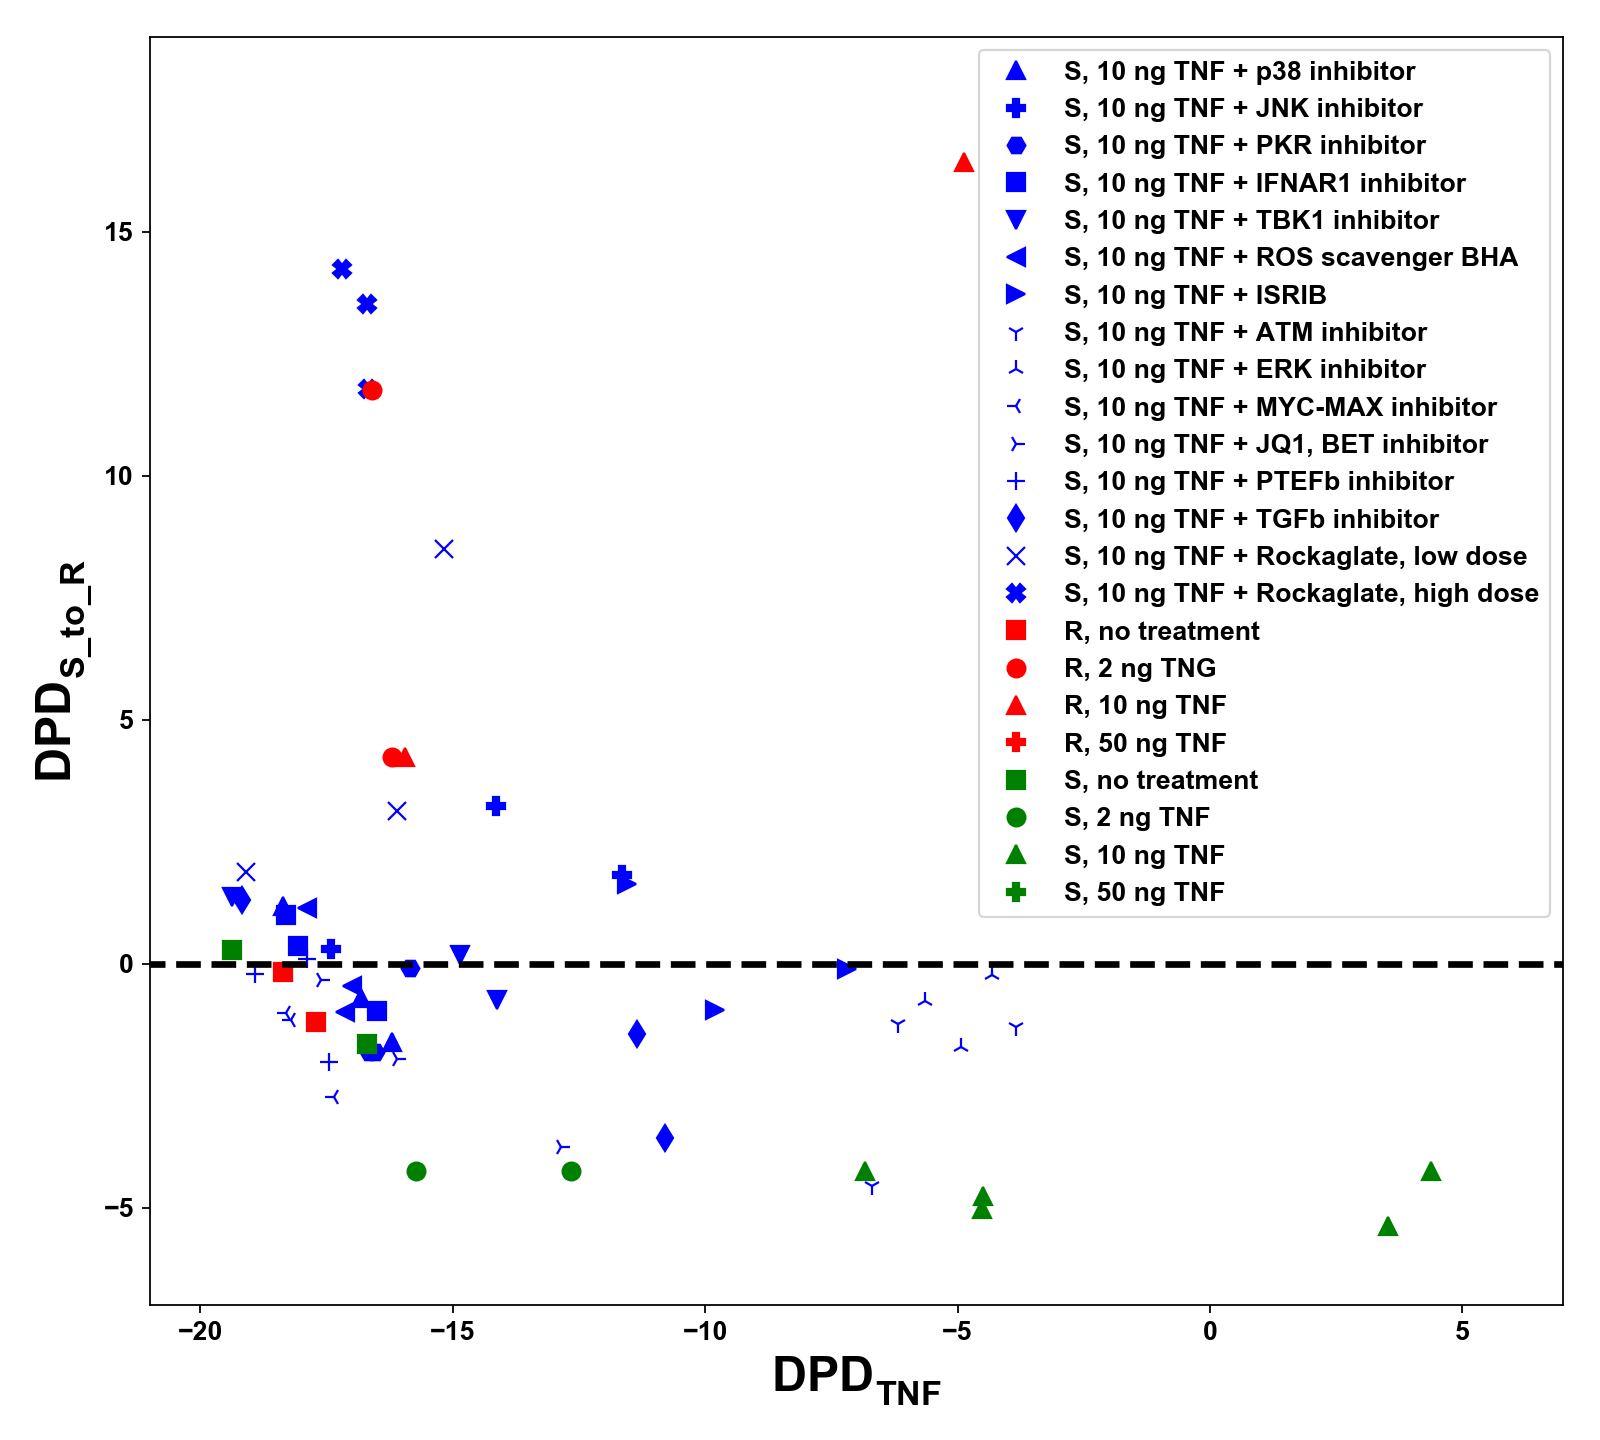

In [19]:
fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 22} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 22} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)


plt.figure(figsize=(10,9))

# perturbed 1h states SET2
# IBX1 - i.p38
plt.plot(DPDs_2D.filter(regex=".*IBX001_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX001_.*",axis=0).iloc[:,1],'^',color='blue',ms=8,label='S, 10 ng TNF + p38 inhibitor') 
# IBX2 - i.JNK
plt.plot(DPDs_2D.filter(regex=".*IBX002_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX002_.*",axis=0).iloc[:,1],'P',color='blue',ms=8,label='S, 10 ng TNF + JNK inhibitor') 
# IBX3 - i.PKR
plt.plot(DPDs_2D.filter(regex=".*IBX003_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX003_.*",axis=0).iloc[:,1],'H',color='blue',ms=8,label='S, 10 ng TNF + PKR inhibitor') 
# IBX4 - i.IFNAR1
plt.plot(DPDs_2D.filter(regex=".*IBX004_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX004_.*",axis=0).iloc[:,1],'s',color='blue',ms=8,label='S, 10 ng TNF + IFNAR1 inhibitor') 
# IBX5 - i.TBK1
plt.plot(DPDs_2D.filter(regex=".*IBX005_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX005_.*",axis=0).iloc[:,1],'v',color='blue',ms=8,label='S, 10 ng TNF + TBK1 inhibitor') 
# IBX6 - i.BHA
plt.plot(DPDs_2D.filter(regex=".*IBX006_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX006_.*",axis=0).iloc[:,1],'<',color='blue',ms=8,label='S, 10 ng TNF + ROS scavenger BHA') 
# IBX7 - ISRIB
plt.plot(DPDs_2D.filter(regex=".*IBX007_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX007_.*",axis=0).iloc[:,1],'>',color='blue',ms=8,label='S, 10 ng TNF + ISRIB') 
# IBX8 - i.ATM
plt.plot(DPDs_2D.filter(regex=".*IBX008_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX008_.*",axis=0).iloc[:,1],'1',color='blue',ms=8,label='S, 10 ng TNF + ATM inhibitor') 
# IBX9 - i.ERK
plt.plot(DPDs_2D.filter(regex=".*IBX009_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX009_.*",axis=0).iloc[:,1],'2',color='blue',ms=8,label='S, 10 ng TNF + ERK inhibitor') 
# IBX10 - i.Myc
plt.plot(DPDs_2D.filter(regex=".*IBX0010_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0010_.*",axis=0).iloc[:,1],'3',color='blue',ms=8,label='S, 10 ng TNF + MYC-MAX inhibitor') 
# IBX11 - JQ1
plt.plot(DPDs_2D.filter(regex=".*IBX0011_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0011_.*",axis=0).iloc[:,1],'4',color='blue',ms=8,label='S, 10 ng TNF + JQ1, BET inhibitor') 
# IBX12 - i.PTEFb
plt.plot(DPDs_2D.filter(regex=".*IBX0012_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0012_.*",axis=0).iloc[:,1],'+',color='blue',ms=8,label='S, 10 ng TNF + PTEFb inhibitor') 
# IBX13 - i.TGFb
plt.plot(DPDs_2D.filter(regex=".*IBX0013_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0013_.*",axis=0).iloc[:,1],'d',color='blue',ms=8,label='S, 10 ng TNF + TGFb inhibitor') 
# IBX14 dose 1 - C10536_dose1
plt.plot(DPDs_2D.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0014_dose1_.*",axis=0).iloc[:,1],'x',color='blue',ms=8,label='S, 10 ng TNF + Rockaglate, low dose') 
# IBX14 dose 2 - C10536_dose2
plt.plot(DPDs_2D.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0014_dose2_.*",axis=0).iloc[:,1],'X',color='blue',ms=8,label='S, 10 ng TNF + Rockaglate, high dose') 
# IBX15 - i.p38+IFNAR1
#plt.plot(DPDs_2D.filter(regex=".*IBX0015_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0015_.*",axis=0).iloc[:,1],'*',color='blue',ms=8,label='p38+IFNAR1 inhibitors') 
# IBX16 - i.p38+Myc
#plt.plot(DPDs_2D.filter(regex=".*IBX0016_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0016_.*",axis=0).iloc[:,1],'p',color='blue',ms=8,label='p38+MYC-MAX inhibitors') 
# IBX17 - i.Myc+i.IFNAR1
#plt.plot(DPDs_2D.filter(regex=".*IBX0017_.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*IBX0017_.*",axis=0).iloc[:,1],'D',color='blue',ms=8,label='MYC-MAX+IFNAR1 inhibitors') 


# B6 states SET1
plt.plot(DPDs_2D.filter(regex=".*B6_NT.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_NT.*",axis=0).iloc[:,1],'s',color='red',label='R, no treatment',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*B6_2ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_2ng.*",axis=0).iloc[:,1],'o',color='red',ms=8,label='R, 2 ng TNG') 
plt.plot(DPDs_2D.filter(regex=".*B6_10ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_10ng.*",axis=0).iloc[:,1],'^',color='red',label='R, 10 ng TNF',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*B6_50ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*B6_50ng.*",axis=0).iloc[:,1],'P',color='red',ms=8,label='R, 50 ng TNF') 
# 1h states SET1
plt.plot(DPDs_2D.filter(regex=".*1h_NT.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_NT.*",axis=0).iloc[:,1],'s',color='green',ms=8,label='S, no treatment') 
plt.plot(DPDs_2D.filter(regex=".*1h_2ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_2ng.*",axis=0).iloc[:,1],'o',color='green',ms=8,label='S, 2 ng TNF') 
plt.plot(DPDs_2D.filter(regex=".*1h_10ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_10ng.*",axis=0).iloc[:,1],'^',color='green',label='S, 10 ng TNF',ms=8) 
plt.plot(DPDs_2D.filter(regex=".*1h_50ng.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*1h_50ng.*",axis=0).iloc[:,1],'P',color='green',ms=8,label='S, 50 ng TNF') 
# 1h states SET2
plt.plot(DPDs_2D.filter(regex=".*TNFA.*",axis=0).iloc[:,0],DPDs_2D.filter(regex=".*TNFA.*",axis=0).iloc[:,1],'^',color='green',ms=8,label='_nolegend_') 

plt.plot([-100,200],[0,0],'--',color='black',linewidth=3)
#plt.plot(xs,y(xs),'-',color='black',linewidth=3)
plt.xlim(-26,8)

plt.xlabel("$\mathregular{DPD_{TNF}}$",**fontLabel)
plt.ylabel("$\mathregular{DPD_{S\_to\_R}}$",**fontLabel)

plt.xlim(-21,7)
plt.ylim(-7,19)
plt.legend()

plt.tight_layout()
plt.show()


In [20]:
PCAweights_fc_df = pd.DataFrame(np.transpose(PCAweights_fc_),columns=['PC1','PC2','PC3'],index=SETS_fc.index)
PCAweights_fc_df

,PC1,PC2,PC3
gene,,,
Actb,0.002435,0.000301,-0.017696
Apaf1,0.012616,-0.010201,-0.040606
Atf3,0.005061,0.011402,-0.026275
Atrnl1,0.049393,-0.041423,-0.160185
Bhlhe40,0.015170,0.013794,-0.020902
CD68,0.004391,0.001486,-0.021803
Ch25h,0.346128,-0.155013,-0.406423
Chac1,0.029490,0.017648,-0.057083
Chd7,0.000511,0.035875,-0.051929


In [22]:
norm_vec_2D_df.sort_values(by='norm_vec_TB',ascending=False)

,norm_vec_TNF,s_vec_TNF,norm_vec_TB,s_vec_TB
gene,,,,
E2f8,-0.046075,0.009661,0.370965,0.151429
Gsdmd,0.098015,0.234735,0.364710,0.498928
Ifrd1,-0.021781,0.051605,0.341390,0.329390
Stat1,0.000000,0.125588,0.287036,0.162662
Igfbp4,-0.049915,-0.009454,0.151444,0.036966
Fzd1,0.082716,0.148044,0.082037,0.168880
Ifi205,0.046651,0.163014,0.032374,0.131939
Actb,-0.030256,-0.002510,-0.015113,-0.005805
Smap1,-0.033431,0.002570,-0.016739,-0.002585


In [23]:
PCAweights_fc_df.sort_values(by='PC2',ascending=False)

,PC1,PC2,PC3
gene,,,
Ifrd1,0.026342,0.944880,-0.123303
Gsdmd,0.224116,0.122271,0.325682
Six1,0.034120,0.116921,-0.134642
Klf4,0.019887,0.106794,-0.052487
Rsad2,0.105610,0.061457,-0.214361
Rhob,0.010304,0.052118,-0.057721
Stat1,0.162647,0.049872,-0.387637
Smad3,0.004508,0.046704,-0.028886
E2f8,0.018161,0.037256,-0.003209


<IPython.core.display.Javascript object>


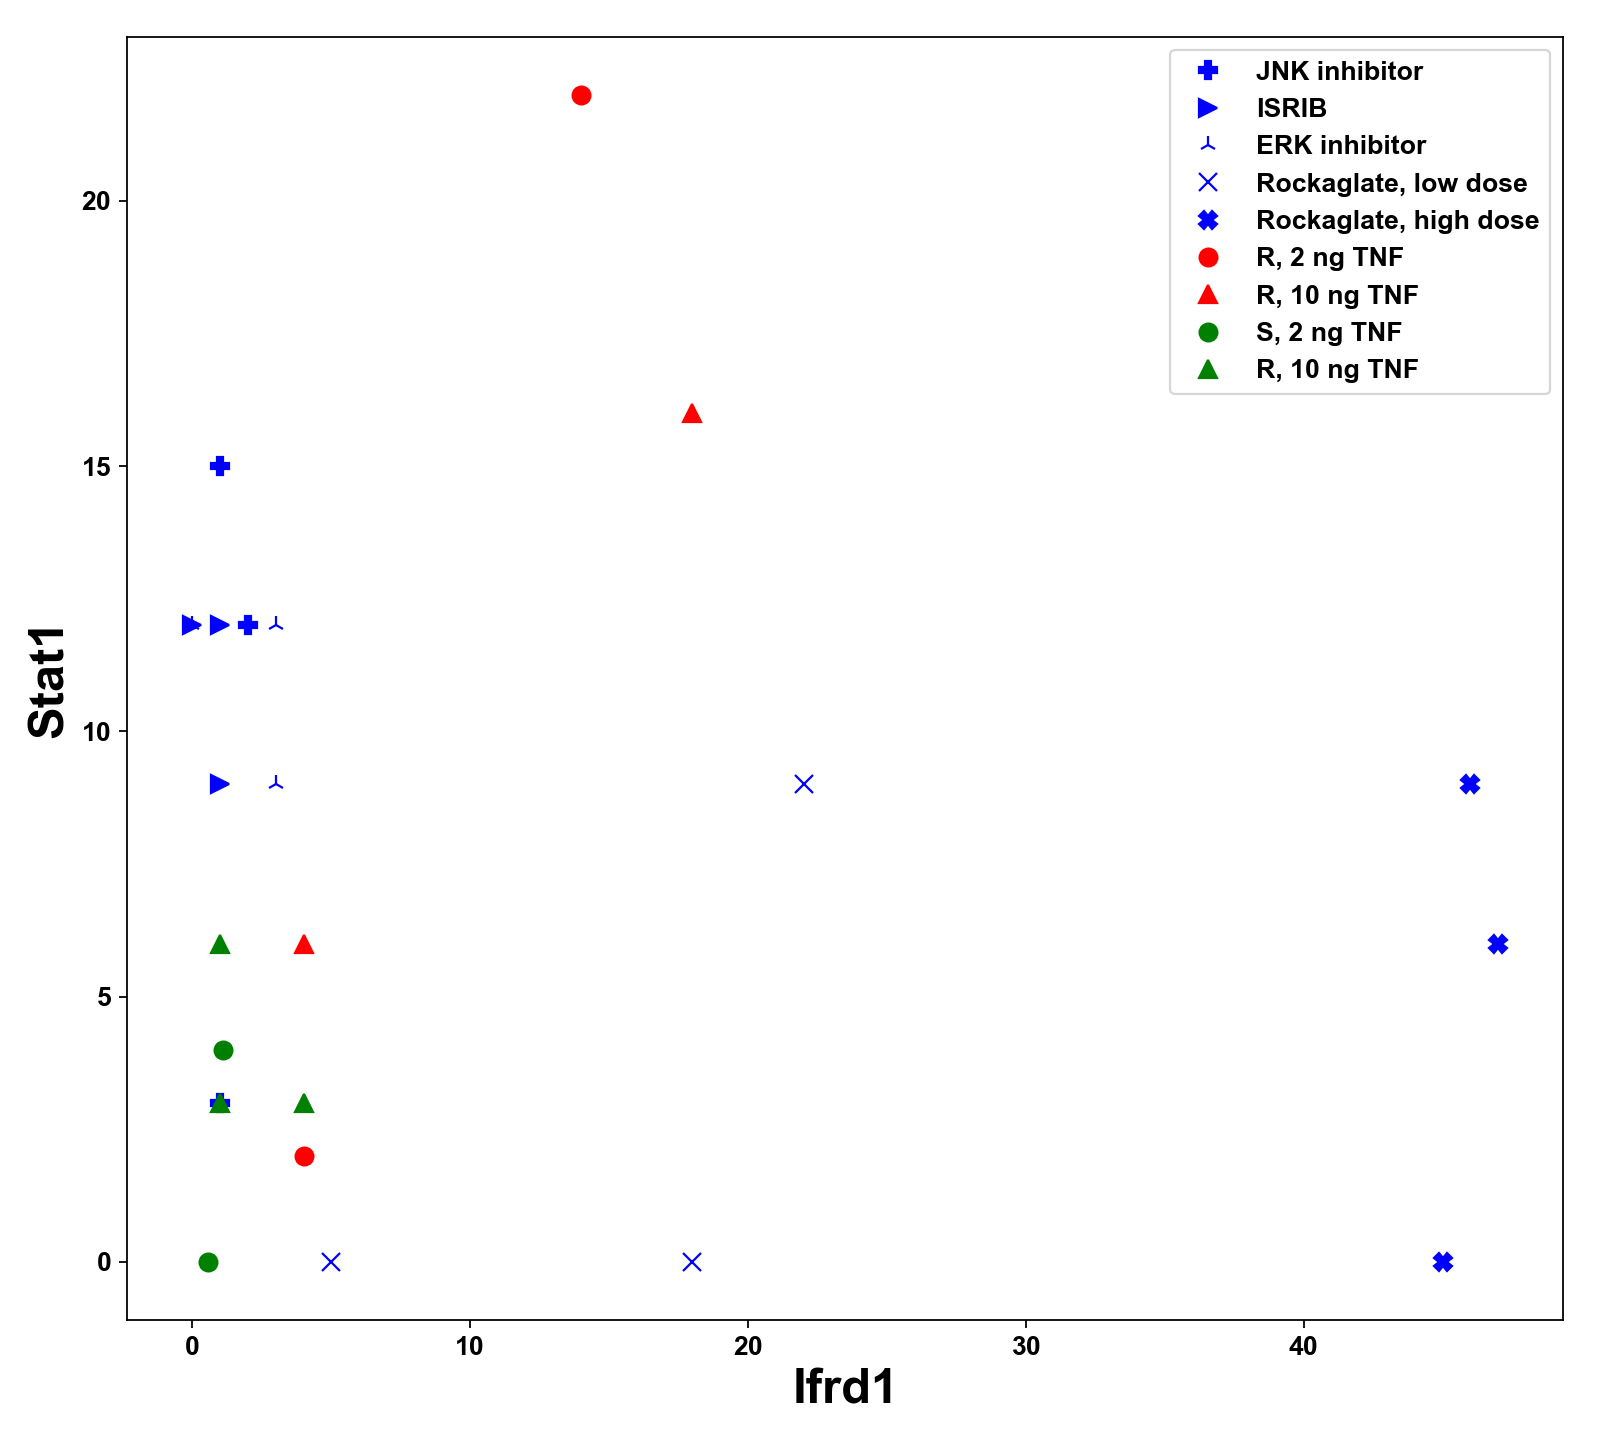

In [24]:
plt.figure(figsize=(10,9))

# perturbed 1h states SET2
# IBX1 - i.p38
#plt.plot(SETS_fc.filter(regex=".*IBX001_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX001_.*",axis=1).loc['Stat1'],'^',color='blue',ms=8,label='p38 inhibitor') 
# IBX2 - i.JNK
plt.plot(SETS_fc.filter(regex=".*IBX002_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX002_.*",axis=1).loc['Stat1'],'P',color='blue',ms=8,label='JNK inhibitor') 
# IBX3 - i.PKR
#plt.plot(SETS_fc.filter(regex=".*IBX003_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX003_.*",axis=1).loc['Stat1'],'H',color='blue',ms=8,label='PKR inhibitor') 
# IBX4 - i.IFNAR1
#plt.plot(SETS_fc.filter(regex=".*IBX004_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX004_.*",axis=1).loc['Stat1'],'s',color='blue',ms=8,label='IFNAR1 inhibitor') 
# IBX5 - i.TBK1
#plt.plot(SETS_fc.filter(regex=".*IBX005_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX005_.*",axis=1).loc['Stat1'],'v',color='blue',ms=8,label='TBK1 inhibitor') 
# IBX6 - i.BHA
#plt.plot(SETS_fc.filter(regex=".*IBX006_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX006_.*",axis=1).loc['Stat1'],'<',color='blue',ms=8,label='ROS scavenger BHA') 
# IBX7 - ISRIB
plt.plot(SETS_fc.filter(regex=".*IBX007_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX007_.*",axis=1).loc['Stat1'],'>',color='blue',ms=8,label='ISRIB') 
# IBX8 - i.ATM
#plt.plot(SETS_fc.filter(regex=".*IBX008_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX008_.*",axis=1).loc['Stat1'],'1',color='blue',ms=8,label='ATM inhibitor') 
# IBX9 - i.ERK
plt.plot(SETS_fc.filter(regex=".*IBX009_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX009_.*",axis=1).loc['Stat1'],'2',color='blue',ms=8,label='ERK inhibitor') 
# IBX10 - i.Myc
#plt.plot(SETS_fc.filter(regex=".*IBX0010_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0010_.*",axis=1).loc['Stat1'],'3',color='blue',ms=8,label='MYC-MAX inhibitor') 
# IBX11 - JQ1
#plt.plot(SETS_fc.filter(regex=".*IBX0011_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0011_.*",axis=1).loc['Stat1'],'4',color='blue',ms=8,label='JQ1, BET inhibitor') 
# IBX12 - i.PTEFb
#plt.plot(SETS_fc.filter(regex=".*IBX0012_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0012_.*",axis=1).loc['Stat1'],'+',color='blue',ms=8,label='PTEFb inhibitor') 
# IBX13 - i.TGFb
#plt.plot(SETS_fc.filter(regex=".*IBX0013_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0013_.*",axis=1).loc['Stat1'],'d',color='blue',ms=8,label='TGFb inhibitor') 
# IBX14 dose 1 - C10536_dose1
plt.plot(SETS_fc.filter(regex=".*IBX0014_dose1_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0014_dose1_.*",axis=1).loc['Stat1'],'x',color='blue',ms=8,label='Rockaglate, low dose') 
# IBX14 dose 2 - C10536_dose2
plt.plot(SETS_fc.filter(regex=".*IBX0014_dose2_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0014_dose2_.*",axis=1).loc['Stat1'],'X',color='blue',ms=8,label='Rockaglate, high dose') 
# IBX15 - i.p38+IFNAR1
#plt.plot(SETS_fc.filter(regex=".*IBX0015_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0015_.*",axis=1).loc['Stat1'],'*',color='blue',ms=8,label='p38+IFNAR1 inhibitors') 
# IBX16 - i.p38+Myc
#plt.plot(SETS_fc.filter(regex=".*IBX0016_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0016_.*",axis=1).loc['Stat1'],'p',color='blue',ms=8,label='p38+MYC-MAX inhibitors') 
# IBX17 - i.Myc+i.IFNAR1
#plt.plot(SETS_fc.filter(regex=".*IBX0017_.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*IBX0017_.*",axis=1).loc['Stat1'],'D',color='blue',ms=8,label='MYC-MAX+IFNAR1 inhibitors') 


# B6 states SET1
#plt.plot(SETS_fc.filter(regex=".*B6_NT.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*B6_NT.*",axis=1).loc['Stat1'],'s',color='black',ms=8) 
plt.plot(SETS_fc.filter(regex=".*B6_2ng.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*B6_2ng.*",axis=1).loc['Stat1'],'o',color='red',ms=8,label='R, 2 ng TNF') 
plt.plot(SETS_fc.filter(regex=".*B6_10ng.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*B6_10ng.*",axis=1).loc['Stat1'],'^',color='red',ms=8,label='R, 10 ng TNF') 
#plt.plot(SETS_fc.filter(regex=".*B6_50ng.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*B6_50ng.*",axis=1).loc['Stat1'],'P',color='red',ms=8) 
# 1h states SET1
#plt.plot(SETS_fc.filter(regex=".*1h_NT.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*1h_NT.*",axis=1).loc['Stat1'],'s',color='black',ms=8) 
plt.plot(SETS_fc.filter(regex=".*1h_2ng.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*1h_2ng.*",axis=1).loc['Stat1'],'o',color='green',ms=8,label='S, 2 ng TNF') 
#plt.plot(SETS_fc.filter(regex=".*1h_10ng.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*1h_10ng.*",axis=1).loc['Stat1'],'^',color='green',ms=8,label='R, 10 ng TNF') 
#plt.plot(SETS_fc.filter(regex=".*1h_50ng.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*1h_50ng.*",axis=1).loc['Stat1'],'P',color='green',ms=8) 
# 1h states SET2
plt.plot(SETS_fc.filter(regex=".*TNFA.*",axis=1).loc['Ifrd1'],SETS_fc.filter(regex=".*TNFA.*",axis=1).loc['Stat1'],'^',color='green',ms=8,label='R, 10 ng TNF') 

#plt.plot(xs,y(xs),'-',color='black',linewidth=3)

plt.xlabel("Ifrd1",**fontLabel)
plt.ylabel("Stat1",**fontLabel)

#plt.xlim(-21,7)
#plt.ylim(-7,19)
plt.legend()

plt.tight_layout()
plt.show()
